# Data Visualization

This demo uses covers various way so to visualize your health data. Follow the steps below to create a `FulcraAPI` instance, authorize it, and retrive data from the API to generate interesting graphs.

# Connecting and Retrieving Your Data

> This notebook is an introduction to accessing your data using the Fulcra
Data API.

This uses the `fulcra-api-python` module, which is available on GitHub
at [https://github.com/fulcradynamics/fulcra-api-python](https://github.com/fulcradynamics/fulcra-api-python).

**Note:** *the output from this step may include pip dependency resolver errors; you can ignore these and move onto the next cell*

In [1]:
!pip install -U fulcra-api


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 6.2.0 requires pyarrow<13,>=2, but you have pyarrow 13.0.0 which is incompatible.
pandas-gbq 0.17.9 requires pyarrow<10.0dev,>=3.0.0, but you have pyarrow 13.0.0 which is incompatible.


In [2]:
from fulcra_api.core import FulcraAPI
import seaborn as sns

fulcra = FulcraAPI()

## Logging in to Fulcra

To make calls to the API, call `authorize()` first.  You authorize the `FulcraAPI`
instance using your browser.  The `authorize()` function will generate a link below
that you should click to log in to Fulcra.  (Depending on the notebook front-end
you're using, this tab may open automatically. On Colaboratory and other hosted
solutions, pop-up blockers usually prevent this from happening.)

Once you've logged in, close the tab; you should see "Authorization succeeded"
displayed in the notebook output.  


In [3]:
fulcra.authorize()

## Retrieving Time Series Data

Once your `FulcraAPI` instance is authorized, you can now use it
to make API calls.

The `time_series_grouped` function returns a Pandas dataframe.

### Available Metrics
The a comprehensive list of available metrics and their descriptions can be found in the [Fulcra Knowledge Base](https://support.fulcradynamics.com/en/articles/8291012-what-metrics-are-available-via-the-fulcra-data-service).

In [4]:
# Try changing the start/end times
start = '2023-09-01 04:00:00.000Z';
end = '2023-09-15 04:00:00.000Z';

# List of metrics to pass to the time_series_grouped method
metric_names = [
    'StepCount',
    'HeartRate',
    'ActiveCaloriesBurned',
    'AppleWatchExerciseTime'
]

# Get data from Fulcra API
# Note: omit sample rate to use default of one second
df = fulcra.time_series_grouped(
    start_time = start,
    end_time = end,
    metrics = metric_names
)

# inspect returned data frame
df

,step_count,heart_rate,heart_rate_src,active_calories_burned,apple_watch_exercise_time
time,,,,,
2023-09-01 04:00:00+00:00,<NA>,NaN,<NA>,NaN,<NA>
2023-09-01 04:01:00+00:00,<NA>,NaN,<NA>,NaN,<NA>
2023-09-01 04:02:00+00:00,<NA>,NaN,<NA>,NaN,<NA>
2023-09-01 04:03:00+00:00,<NA>,NaN,<NA>,NaN,<NA>
2023-09-01 04:04:00+00:00,<NA>,NaN,<NA>,NaN,<NA>
...,...,...,...,...,...
2023-09-15 03:55:00+00:00,<NA>,NaN,<NA>,NaN,<NA>
2023-09-15 03:56:00+00:00,<NA>,NaN,<NA>,NaN,<NA>
2023-09-15 03:57:00+00:00,<NA>,NaN,<NA>,NaN,<NA>


## Adding Date-Related Columns
Add columns to the dataframe so we have more date-related information to use when creating various charts.

In [5]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekdayName'] = df.index.day_name()
df['weekday'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['weekend'] = df.index.weekday // 5 == 1
df['date'] = df.index
df['hour'] = df.index.hour

## Boxplot Demo: Day of Month

Now we can plot the min and max heart rate for each day using the `sns.boxplot()` method and the data retrieved from the `FulcraAPI`.

**Note:** *for this to work properly, make sure the time range for the data frame only includes a single month.*

Text(0.5, 1.0, 'Min / Max Heart Rate')

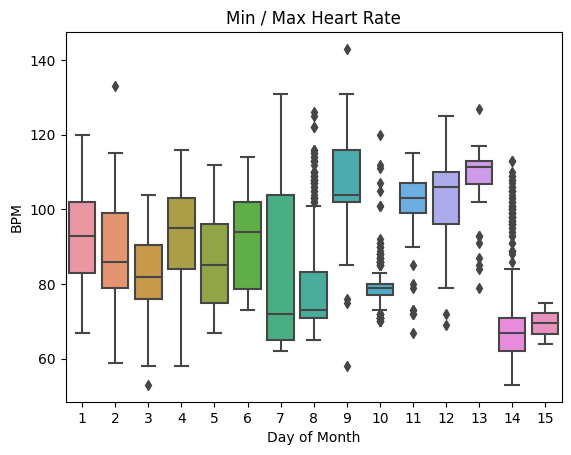

In [16]:
# create boxplot
boxplot = sns.boxplot(data=df, x='day', y='heart_rate')

# set x/y axis labels
boxplot.set(xlabel='Day of Month', ylabel='BPM')

# set chart title
boxplot.set_title('Min / Max Heart Rate over Month')

## Boxplot Demo: Day of Week

Same as above, but grouping by day of week instead of showing each day of the month:

Text(0.5, 1.0, 'Min / Max Heart Rate by Weekday')

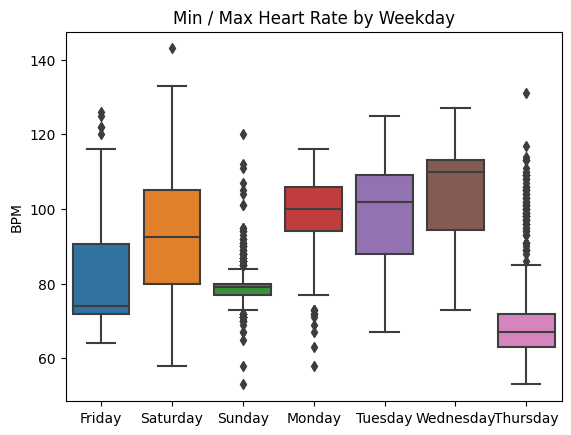

In [24]:
# create boxplot
boxplot = sns.boxplot(data=df, x='weekdayName', y='heart_rate')

# set x/y axis labels
boxplot.set(xlabel='', ylabel='BPM')

# set chart title
boxplot.set_title('Min / Max Heart Rate by Weekday')

## Box Plot with Swarm Plot Overlay

In this next example we'll demonstrate how you can overlay a swarm plot to view the specific data points that generate the box plot from above:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 84.3% of the points cannot be placed;

Text(0.5, 1.0, 'Min / Max Heart Rate')

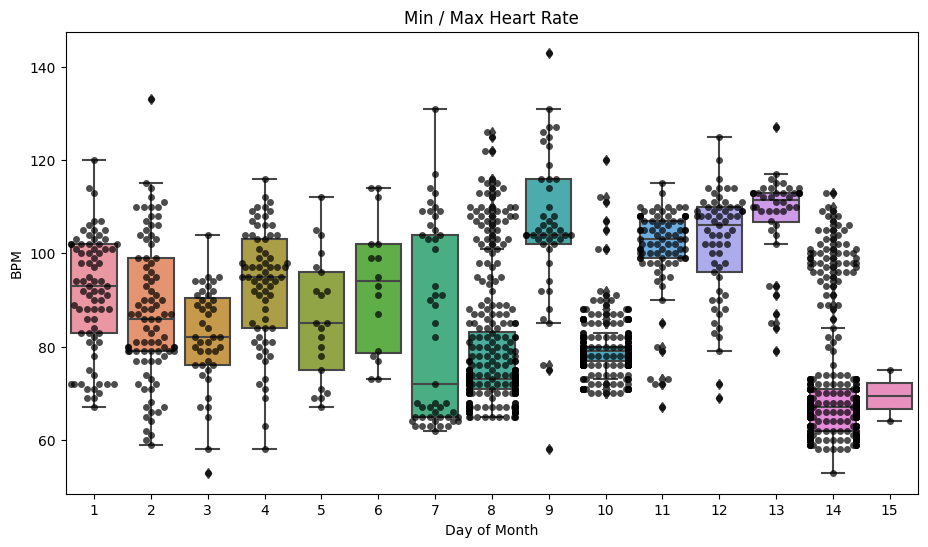

In [17]:
from matplotlib import pyplot as plt

# Set figure size with matplotlib
plt.figure(figsize=(11,6))

# Create plot
sns.boxplot(
    x='day',
    y='heart_rate',
    data=df
).set(xlabel='Day of Month', ylabel='BPM')

sns.swarmplot(
    x='day',
    y='heart_rate',
    data=df,
    color='k', # Make points black
    alpha=0.7  # and slightly transparent
)

# Set title with matplotlib
plt.title('Min / Max Heart Rate')